In [43]:
import os
import zipfile
import json
import csv
import pickle
import pandas as pd
pd.set_option('max_colwidth', 150)
import re
import string
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

from gensim.parsing.preprocessing import remove_stopwords

[nltk_data] Downloading package stopwords to /Users/SiD/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Extracting data into dataframe

In [2]:
# Unzip the data
zip_text = zipfile.ZipFile('bbc-fulltext.zip', 'r')
zip_text.extractall('/Users/SiD/environments/TF to AI/NLP/bbc_fulltext/')
zip_text.close()

In [3]:
# Create the necessary directory variables

base_dir = '/Users/SiD/environments/TF to AI/NLP/bbc_fulltext/'

bus_dir = os.path.join(base_dir, 'business/')
ent_dir = os.path.join(base_dir, 'entertainment/')
pol_dir = os.path.join(base_dir, 'politics/')
spo_dir = os.path.join(base_dir, 'sport/')
tec_dir = os.path.join(base_dir, 'tech/')

In [4]:
# print the number of documents for each label
print('Number of business docs:', len(os.listdir(bus_dir)))
print('Number of entertainment docs:', len(os.listdir(ent_dir)))
print('Number of politics docs:', len(os.listdir(pol_dir)))
print('Number of sport docs:', len(os.listdir(spo_dir)))
print('Number of tech docs:', len(os.listdir(tec_dir)))

Number of business docs: 510
Number of entertainment docs: 386
Number of politics docs: 417
Number of sport docs: 512
Number of tech docs: 401


In [5]:
# Extract business documents from directory and place into a dataframe
bus_data = {}
bus_files = os.listdir(bus_dir)

for i, file in enumerate(bus_files):
    with open(bus_dir + '/' + file, 'r') as f:
        bus_data[i] = f.read()
        
bus_df = pd.Series(bus_data).to_frame('doc')
bus_df['label'] = 'business'
bus_df

,doc,label
0,"UK economy facing 'major risks'\n\nThe UK manufacturing sector will continue to face ""serious challenges"" over the next two years, the British Cha...",business
1,Aids and climate top Davos agenda\n\nClimate change and the fight against Aids are leading the list of concerns for the first day of the World Eco...,business
2,Asian quake hits European shares\n\nShares in Europe's leading reinsurers and travel firms have fallen as the scale of the damage wrought by tsuna...,business
3,"India power shares jump on debut\n\nShares in India's largest power producer, National Thermal Power Corp (NTPC) have risen 13% on their stock mar...",business
4,Lacroix label bought by US firm\n\nLuxury goods group LVMH has sold its loss-making Christian Lacroix clothing label to a US investment group.\n\n...,business
...,...,...
505,"Jobs growth still slow in the US\n\nThe US created fewer jobs than expected in January, but a fall in jobseekers pushed the unemployment rate to i...",business
506,Renault boss hails 'great year'\n\nStrong sales outside western Europe helped Renault boost its profits by more than 40% in 2004 although the firm...,business
507,"Euro firms miss out on optimism\n\nMore than 90% of large companies around the world are highly optimistic about their economic prospects, a surve...",business
508,"Bank holds interest rate at 4.75%\n\nThe Bank of England has left interest rates on hold again at 4.75%, in a widely-predicted move.\n\nRates went...",business


In [6]:
# Extract entertainment documents from directory and place into a dataframe
ent_data = {}
ent_files = os.listdir(ent_dir)

for i, file in enumerate(ent_files):
    with open(ent_dir + '/' + file, 'r') as f:
        ent_data[i] = f.read()
        
ent_df = pd.Series(ent_data).to_frame('doc')
ent_df['label'] = 'entertainment'
ent_df

,doc,label
0,Musicians to tackle US red tape\n\nMusicians' groups are to tackle US visa regulations which are blamed for hindering British acts' chances of suc...,entertainment
1,"U2's desire to be number one\n\nU2, who have won three prestigious Grammy Awards for their hit Vertigo, are stubbornly clinging to their status as...",entertainment
2,Rocker Doherty in on-stage fight\n\nRock singer Pete Doherty has been involved in a fight with his band's guitarist at their biggest gig to date.\...,entertainment
3,"Snicket tops US box office chart\n\nThe film adaptation of Lemony Snicket novels has topped the North America box office chart, displacing Ocean's...",entertainment
4,"Ocean's Twelve raids box office\n\nOcean's Twelve, the crime caper sequel starring George Clooney, Brad Pitt and Julia Roberts, has gone straight ...",entertainment
...,...,...
381,Bookmakers back Aviator for Oscar\n\nThe Aviator has been tipped by UK bookmakers as the favourite to win the best film award at this year's Oscar...,entertainment
382,"Scissor Sisters triumph at Brits\n\nUS band Scissor Sisters led the winners at the UK music industry's Brit Awards, walking off with three prizes....",entertainment
383,Spears seeks aborted tour payment\n\nSinger Britney Spears is suing eight insurance companies that have refused to reimburse her for cancelling he...,entertainment
384,"Angels 'favourite funeral song'\n\nAngels by Robbie Williams is the song Britons would most like played at their funeral, a survey has suggested.\...",entertainment


In [7]:
# Extract politics documents from directory and place into a dataframe
pol_data = {}
pol_files = os.listdir(pol_dir)

for i, file in enumerate(pol_files):
    with open(pol_dir + '/' + file, 'r') as f:
        pol_data[i] = f.read()
        
pol_df = pd.Series(pol_data).to_frame('doc')
pol_df['label'] = 'politics'
pol_df

,doc,label
0,Baron Kinnock makes Lords debut\n\nFormer Labour leader Neil Kinnock has officially been made a life peer during a ceremony in the House of Lords....,politics
1,"Howard taunts Blair over splits\n\nTony Blair's feud with Gordon Brown is damaging the way the UK is governed, Tory leader Michael Howard has clai...",politics
2,Donor attacks Blair-Brown 'feud'\n\nThe reported feud between Tony Blair and Gordon Brown has prompted a Labour donor to say he will almost certai...,politics
3,"Cardinal criticises Iraq war cost\n\nBillions of pounds spent on conflict in Iraq and in the Middle East should have been used to reduce poverty, ...",politics
4,BNP leader Nick Griffin arrested\n\nThe leader of the British National Party has been arrested as part of a police inquiry following the screening...,politics
...,...,...
412,"Howard backs stem cell research\n\nMichael Howard has backed stem cell research, saying it is important people are not frightened of the future.\n...",politics
413,"Blair dismisses quit claim report\n\nTony Blair has dismissed reports he told Gordon Brown he would quit before the next general election.\n\n""You...",politics
414,"Kennedy to make temple address\n\nCharles Kennedy is set to address 2,000 people at a Hindu temple as part of an appeal to ethnic minority voters....",politics
415,Terror powers expose 'tyranny'\n\nThe Lord Chancellor has defended government plans to introduce control orders to keep foreign and British terror...,politics


In [8]:
# Extract sport documents from directory and place into a dataframe
spo_data = {}
spo_files = os.listdir(spo_dir)

for i, file in enumerate(spo_files):
    with io.open(spo_dir + '/' + file, 'r', encoding='windows-1252') as f:
        spo_data[i] = f.read()
        
spo_df = pd.Series(spo_data).to_frame('doc')
spo_df['label'] = 'sport'
spo_df

,doc,label
0,"Fuming Robinson blasts officials\n\nEngland coach Andy Robinson insisted he was ""livid"" after his side were denied two tries in Sunday's 19-13 Six...",sport
1,Veteran Martinez wins Thai title\n\nConchita Martinez won her first title in almost five years with victory over Anna-Lena Groenefeld at the Volvo...,sport
2,Spurs to sign Iceland U21 star\n\nTottenham are primed to snap up Iceland Under-21 international Emil Hallfredsson after he impressed on trial at ...,sport
3,Mexicans tracking unhappy Juninho\n\nMexican outfit Red Sharks Veracruz hope to sign Juninho if the Brazilian decides to leave Celtic frustrated a...,sport
4,Mirza makes Indian tennis history\n\nTeenager Sania Mirza completed a superb week at the Hyderabad Open by becoming the first Indian in history to...,sport
...,...,...
507,Old Firm pair handed suspensions\n\nCeltic's Henri Camara and Nacho Novo of Rangers have both been suspended for offences missed by the referee in...,sport
508,"Real will finish abandoned match\n\nReal Madrid and Real Socieded will play the final six minutes of their match, which was abandoned on Sunday be...",sport
509,Melzer shocks Agassi in San Jose\n\nSecond seed Andre Agassi suffered a comprehensive defeat by Jurgen Melzer in the quarter-finals of the SAP Ope...,sport
510,"O'Gara revels in Ireland victory\n\nIreland fly-half Ronan O'Gara hailed his side's 19-13 victory over England as a ""special"" win.\n\nThe Munster ...",sport


In [9]:
# Extract tech documents from directory and place into a dataframe
tec_data = {}
tec_files = os.listdir(tec_dir)

for i, file in enumerate(tec_files):
    with open(tec_dir + '/' + file, 'r') as f:
        tec_data[i] = f.read()
        
tec_df = pd.Series(tec_data).to_frame('doc')
tec_df['label'] = 'tech'
tec_df

,doc,label
0,Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone ca...,tech
1,"Broadband steams ahead in the US\n\nMore and more Americans are joining the internet's fast lane, according to official figures.\n\nThe number of ...",tech
2,EA to take on film and TV giants\n\nVideo game giant Electronic Arts (EA) says it wants to become the biggest entertainment firm in the world.\n\n...,tech
3,Microsoft releases patches\n\nMicrosoft has warned PC users to update their systems with the latest security fixes for flaws in Windows programs.\...,tech
4,"China 'to overtake US net use'\n\nThe Chinese net-using population looks set to exceed that of the US in less than three years, says a report.\n\n...",tech
...,...,...
396,"Warning over Windows Word files\n\nWriting a Microsoft Word document can be a dangerous business, according to document security firm Workshare.\n...",tech
397,Fast lifts rise into record books\n\nTwo high-speed lifts at the world's tallest building have been officially recognised as the planet's fastest....,tech
398,Nintendo adds media playing to DS\n\nNintendo is releasing an adapter for its DS handheld console so it can play music and video.\n\nThe add-on fo...,tech
399,Fast moving phone viruses appear\n\nSecurity firms are warning about several mobile phone viruses that can spread much faster than similar bugs.\n...,tech


In [10]:
# Concatenate all the documents to form a single dataframe
data = pd.concat([bus_df, ent_df, spo_df, pol_df, tec_df])
data = data.reset_index()
del data['index']

In [11]:
data

,doc,label
0,"UK economy facing 'major risks'\n\nThe UK manufacturing sector will continue to face ""serious challenges"" over the next two years, the British Cha...",business
1,Aids and climate top Davos agenda\n\nClimate change and the fight against Aids are leading the list of concerns for the first day of the World Eco...,business
2,Asian quake hits European shares\n\nShares in Europe's leading reinsurers and travel firms have fallen as the scale of the damage wrought by tsuna...,business
3,"India power shares jump on debut\n\nShares in India's largest power producer, National Thermal Power Corp (NTPC) have risen 13% on their stock mar...",business
4,Lacroix label bought by US firm\n\nLuxury goods group LVMH has sold its loss-making Christian Lacroix clothing label to a US investment group.\n\n...,business
...,...,...
2221,"Warning over Windows Word files\n\nWriting a Microsoft Word document can be a dangerous business, according to document security firm Workshare.\n...",tech
2222,Fast lifts rise into record books\n\nTwo high-speed lifts at the world's tallest building have been officially recognised as the planet's fastest....,tech
2223,Nintendo adds media playing to DS\n\nNintendo is releasing an adapter for its DS handheld console so it can play music and video.\n\nThe add-on fo...,tech
2224,Fast moving phone viruses appear\n\nSecurity firms are warning about several mobile phone viruses that can spread much faster than similar bugs.\n...,tech


### Data cleaning

In [12]:
data

,doc,label
0,"UK economy facing 'major risks'\n\nThe UK manufacturing sector will continue to face ""serious challenges"" over the next two years, the British Cha...",business
1,Aids and climate top Davos agenda\n\nClimate change and the fight against Aids are leading the list of concerns for the first day of the World Eco...,business
2,Asian quake hits European shares\n\nShares in Europe's leading reinsurers and travel firms have fallen as the scale of the damage wrought by tsuna...,business
3,"India power shares jump on debut\n\nShares in India's largest power producer, National Thermal Power Corp (NTPC) have risen 13% on their stock mar...",business
4,Lacroix label bought by US firm\n\nLuxury goods group LVMH has sold its loss-making Christian Lacroix clothing label to a US investment group.\n\n...,business
...,...,...
2221,"Warning over Windows Word files\n\nWriting a Microsoft Word document can be a dangerous business, according to document security firm Workshare.\n...",tech
2222,Fast lifts rise into record books\n\nTwo high-speed lifts at the world's tallest building have been officially recognised as the planet's fastest....,tech
2223,Nintendo adds media playing to DS\n\nNintendo is releasing an adapter for its DS handheld console so it can play music and video.\n\nThe add-on fo...,tech
2224,Fast moving phone viruses appear\n\nSecurity firms are warning about several mobile phone viruses that can spread much faster than similar bugs.\n...,tech


In [13]:
def text_clean_round1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', ' ', text)
    #text = re.sub('\\', '', text)
    return text

In [14]:
round1 = lambda x: text_clean_round1(x)
data_clean = pd.DataFrame(data['doc'].apply(round1))

In [15]:
data_clean['doc'][100]

'budget aston takes on porsche  british car maker aston martin has gone headtohead with porsches  sports cars with the launch of its cheapest model yet  with a price tag under £ the  vantage is tens of thousands of pounds cheaper than existing aston models the vantage is the most important car in the history of our company said astons chief executive ulrich bez aston  whose cars were famously used by james bond  will unveil the vantage at the geneva motor show on thursday mr bez  himself a former executive at rival porsche  said the new car was the companys most affordable car ever and makes the brand accessible this in turn would make aston martin globally visible but still very very exclusive he added  first shown as a concept car at the  north american international auto show in detroit the  vantage will be available in the uk in late summer development costs for the vantage have been kept low by sharing a platform with astons  which mr bez described as the previous most important c

In [16]:
def text_clean_round2(text):
    text = re.sub('£', '', text)
    text = re.sub('  ', ' ', text)
    return text

round2 = lambda x: text_clean_round2(x)
data_clean = pd.DataFrame(data_clean['doc'].apply(round2))

### Removing stopwords

In [17]:
stop = stopwords.words('english')

In [18]:
data_nostop = pd.DataFrame()
data_nostop['doc'] = data_clean['doc'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [19]:
data_nostop['label'] = data['label']

In [20]:
data_nostop

,doc,label
0,uk economy facing major risks uk manufacturing sector continue face serious challenges next two years british chamber commerce bcc said groups qua...,business
1,aids climate top davos agenda climate change fight aids leading list concerns first day world economic forum swiss resort davos business political...,business
2,asian quake hits european shares shares europes leading reinsurers travel firms fallen scale damage wrought tsunamis across south asia become appa...,business
3,india power shares jump debut shares indias largest power producer national thermal power corp ntpc risen stock market debut governments partial s...,business
4,lacroix label bought us firm luxury goods group lvmh sold lossmaking christian lacroix clothing label us investment group parisbased firm shedding...,business
...,...,...
2221,warning windows word files writing microsoft word document dangerous business according document security firm workshare business documents contai...,tech
2222,fast lifts rise record books two highspeed lifts worlds tallest building officially recognised planets fastest lifts take seconds whisk passengers...,tech
2223,nintendo adds media playing ds nintendo releasing adapter ds handheld console play music video addon ds means people download tv programmes film c...,tech
2224,fast moving phone viruses appear security firms warning several mobile phone viruses spread much faster similar bugs new strains cabir mobile phon...,tech


### Shuffle data before splitting to train and test

In [21]:
data_shuffle = shuffle(data_nostop)

In [22]:
data_shuffle

,doc,label
1492,eu china arms ban lifted eu embargo arms exports china likely lifted next six months despite us objections uk foreign secretary jack straw said ba...,politics
825,tautou star da vinci film french actress audrey tautou star hit film amelie play female lead film adaptation da vinci code reported movie version ...,entertainment
1246,ireland v usa sat saturday november lansdowne road dublin gmt irish coach knows repeat record victory states agenda expects real test lansdowne ro...,sport
1074,jones medals must go guilty world antidoping agency wada chief dick pound says marion jones stripped medals found guilty taking banned substances ...,sport
1083,johnson announces june retirement former england captain martin johnson announced retire rugby union end season johnson captained england world cu...,sport
...,...,...
37,cars pull us retail figures us retail sales fell january biggest monthly decline since last august driven heavy fall car sales fall car sales expe...,business
1555,lib dems predict best ever poll lib dems set best results general election local council polls one frontbenchers predicted local government spokes...,politics
1503,kinnock urge reform lords neil kinnock said acceptance seat house lords allow help achieve progress substantial democratic reform bbcs breakfast f...,politics
366,fed chief warning us deficit federal reserve chairman alan greenspan warned allowing huge us budget deficits continue could severe consequences sp...,business


In [23]:
len(data_shuffle)

2226

### Splitting data to train, val and test dataset
We split the docs and labels into train for training, val for computing valindation scores, and test for evaluating the model at the end

In [24]:
training_portion = 0.85
validation_portion = 0.95

train_size = int(len(data_shuffle) * training_portion)
val_size = int(len(data_shuffle) * validation_portion)

train_docs = data_shuffle['doc'][:train_size]
train_labels = data_shuffle['label'][:train_size]

val_docs = data_shuffle['doc'][train_size:val_size]
val_labels = data_shuffle['label'][train_size:val_size]

test_docs = data_shuffle['doc'][val_size:]
test_labels = data_shuffle['label'][val_size:]

print(len(train_docs))
print(len(train_labels))
print(len(val_docs))
print(len(val_labels))
print(len(test_docs))
print(len(test_labels))

1892
1892
222
222
112
112


### Tokenizing

In [25]:
vocab_size = 10000
embedding_dim = 16
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [26]:
# Tokenize train set

tokenizer = Tokenizer(num_words = vocab_size, oov_token='<oov>')
tokenizer.fit_on_texts(train_docs)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_docs)
train_padded = pad_sequences(train_seq, maxlen=max_length,
                            padding=padding_type,
                            truncating=trunc_type)

In [27]:
print(len(train_seq[0]))
print(len(train_padded[0]))

print(len(train_seq[10]))
print(len(train_padded[10]))

print(len(train_seq[20]))
print(len(train_padded[20]))

215
150
203
150
120
150


In [28]:
# tokenize the val set

val_seq = tokenizer.texts_to_sequences(val_docs)
val_padded = pad_sequences(val_seq, maxlen=max_length,
                          padding=padding_type,
                          truncating=trunc_type)

In [29]:
print(len(val_seq[0]))
print(len(val_padded[0]))

print(len(val_seq[10]))
print(len(val_padded[10]))

print(len(val_seq[20]))
print(len(val_padded[20]))

201
150
201
150
158
150


In [30]:
# tokenize test set

test_seq = tokenizer.texts_to_sequences(test_docs)
test_padded = pad_sequences(test_seq, maxlen=max_length,
                           padding=padding_type,
                           truncating=trunc_type)

In [31]:
print(len(test_seq[0]))
print(len(test_padded[0]))

print(len(test_seq[10]))
print(len(test_padded[10]))

print(len(test_seq[20]))
print(len(test_padded[20]))

207
150
139
150
218
150


In [32]:
# tokenize labels

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
val_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [33]:
print('Test Labels:')
print(train_label_seq[0])
print(train_label_seq[1000])
print(train_label_seq[1500])
print(train_label_seq.shape)
print('----------------')

print('Val Labels:')
print(val_label_seq[0])
print(val_label_seq[100])
print(val_label_seq[200])
print(val_label_seq.shape)
print('----------------')

print('Test Labels:')
print(test_label_seq[0])
print(test_label_seq[50])
print(test_label_seq[100])
print(test_label_seq.shape)

Test Labels:
[3]
[2]
[1]
(1892, 1)
----------------
Val Labels:
[2]
[1]
[3]
(222, 1)
----------------
Test Labels:
[5]
[4]
[3]
(112, 1)


### Modelling

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(train_padded, train_label_seq,
                    epochs=20,
                    validation_data=(val_padded, val_label_seq),
                    verbose=1)

Train on 1892 samples, validate on 222 samples
Epoch 1/20
1892/1892 [==============================] - 1s 389us/sample - loss: 1.7456 - accuracy: 0.2294 - val_loss: 1.6793 - val_accuracy: 0.2387
Epoch 2/20
1892/1892 [==============================] - 0s 255us/sample - loss: 1.6055 - accuracy: 0.3192 - val_loss: 1.5079 - val_accuracy: 0.4369
Epoch 3/20
1892/1892 [==============================] - 0s 179us/sample - loss: 1.3834 - accuracy: 0.5418 - val_loss: 1.2609 - val_accuracy: 0.6171
Epoch 4/20
1892/1892 [==============================] - 0s 221us/sample - loss: 1.0769 - accuracy: 0.7812 - val_loss: 0.9630 - val_accuracy: 0.7838
Epoch 5/20
1892/1892 [==============================] - 0s 195us/sample - loss: 0.7522 - accuracy: 0.9318 - val_loss: 0.6921 - val_accuracy: 0.8919
Epoch 6/20
1892/1892 [==============================] - 0s 194us/sample - loss: 0.4865 - accuracy: 0.9641 - val_loss: 0.4923 - val_accuracy: 0.9369
Epoch 7/20
1892/1892 [==============================] - 0s 200us/

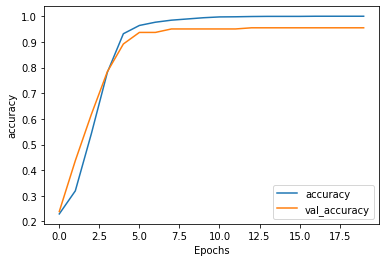

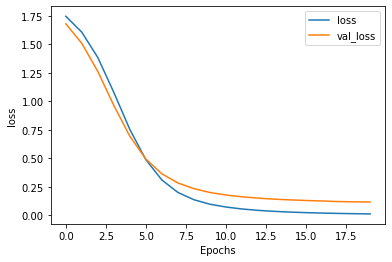

In [36]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [37]:
model.evaluate(test_padded, test_label_seq)

112/112 [==============================] - 0s 134us/sample - loss: 0.0981 - accuracy: 0.9821


[0.09805732326848167, 0.98214287]